<center>
    <h1>An introduction to Bagging Models with Scikit-Learn</h1>
    <br /><br />
    Omoju Miller (<a href="https://twitter.com/omojumiller">@omojumiller</a>)
</center>

In [1]:
# Global imports and settings
# Import libraries
from __future__ import absolute_import, print_function
from tutorial import plot_clf

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (6, 6)
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=3)


# Scikit-Learn
## Overview

* Machine learning library written in __Python__
* __Simple and efficient__, for both experts and non-experts
* Classical, __well-established machine learning algorithms__
* Shipped with <a href="http://scikit-learn.org/dev/documentation.html">documentation</a> and <a href="http://scikit-learn.org/dev/auto_examples/index.html">examples</a>

# Data 


In [2]:
# Generate data
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=20, random_state=42)
labels = ['hotpink', 'dodgerblue']
print('first 5 elements of y is:\n',y[:5])
y = np.take(labels, (y < 10))

print('\nX is:\n', X, '\n')
print('first 5 elements of y is:\n',y[:5])

first 5 elements of y is:
 [19 10  8  1 16]

X is:
 [[  4.206  -0.552]
 [  2.314  -8.493]
 [ -3.546   0.102]
 ..., 
 [ -9.634  10.064]
 [ -3.626   2.95 ]
 [  3.857   1.651]] 

first 5 elements of y is:
 ['hotpink' 'hotpink' 'dodgerblue' 'dodgerblue' 'hotpink']


In [3]:
# X is a 2 dimensional array, with 1000 rows and 2 columns
print(X.shape)
 
# y is a vector of 1000 elements
print(y.shape)

(1000, 2)
(1000,)


hotpink
dodgerblue


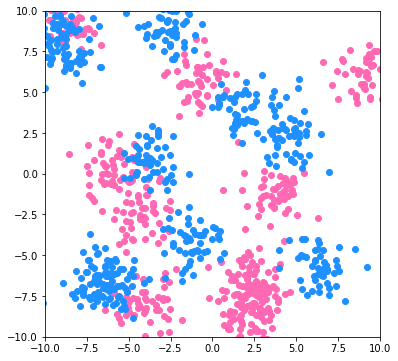

In [5]:
# Plot
plt.figure()
for label in labels:
    mask = (y == label)
    print(label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

# Tree Based Models
Learning a classifier can be restated as learning a partition of $X$ matching as closely as possible the best possible partition, i.e., the best possible classifier consists in systematically predicting the most likely class of $y$ given our $X$

## Decision Tree
### Idea: greedily build a partition of the input space using cuts orthogonal to feature axes.

### Features 
- Age
- Gender
 
<img src="img/decisiontree_1.png" style="max-width: 680px; display: inline" />


## Scikit-learn provides a simple and unified API

All learning algorithms in scikit-learn share a uniform and limited API consisting of complementary interfaces:

- an `estimator` interface for building and fitting models
- a `predictor` interface for making predictions
- a `transformer` interface for converting data



In [6]:
# Import the Decision Tree class
from sklearn.tree import DecisionTreeClassifier 

# Set hyper-parameters, for controlling algorithm
clf = DecisionTreeClassifier(max_depth=6)

# Learn a model from training data
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Predictors

In [7]:
# Make predictions  
print(clf.predict(X[:5])) 

['hotpink' 'hotpink' 'dodgerblue' 'dodgerblue' 'dodgerblue']


In [8]:
# Compute (approximate) class probabilities
print(clf.predict_proba(X[:5]))

[[ 0.167  0.833]
 [ 0.     1.   ]
 [ 0.581  0.419]
 [ 0.989  0.011]
 [ 0.603  0.397]]


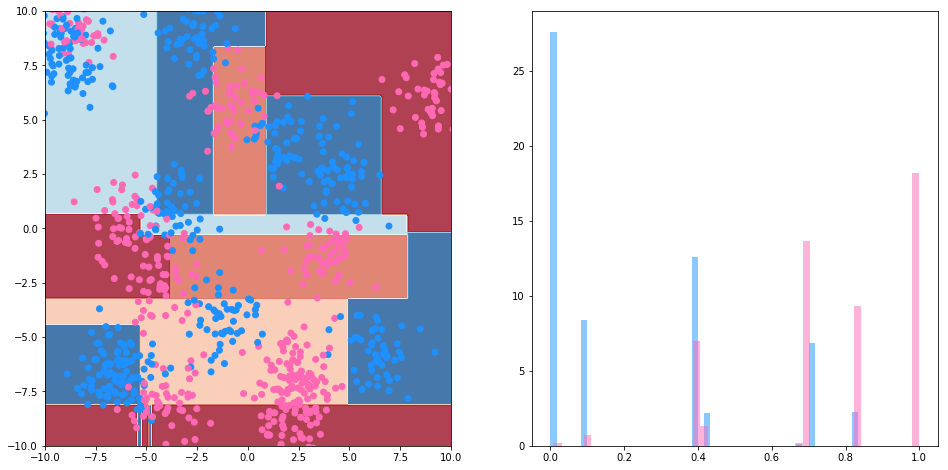

In [9]:
plot_clf(clf, X, y)

## An Ensemble of Decision Trees: Bagging Models
### Idea: Build several decision trees with controlled randomness and average their decisions.
<img src="img/bagging.jpg" style="max-width: 680px; display: inline" />


<img src="img/decisiontree_2.png" style="max-width: 680px; display: inline" />

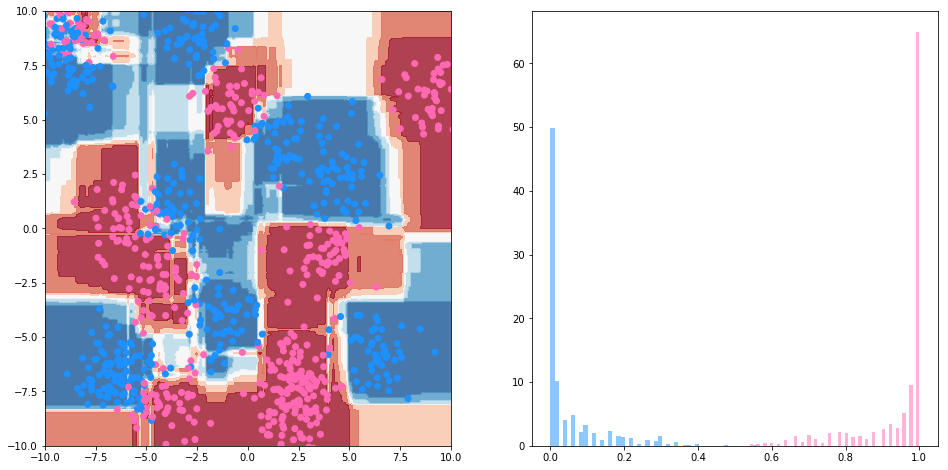

In [10]:
from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(n_estimators=50)
clf.fit(X, y)
plot_clf(clf, X, y)

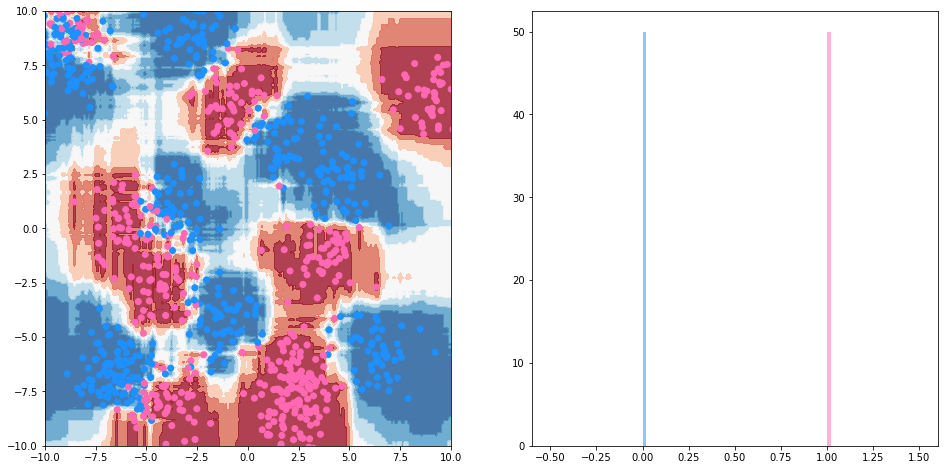

In [11]:
from sklearn.ensemble import ExtraTreesClassifier 
clf = ExtraTreesClassifier(n_estimators=50)
clf.fit(X, y)
plot_clf(clf, X, y)

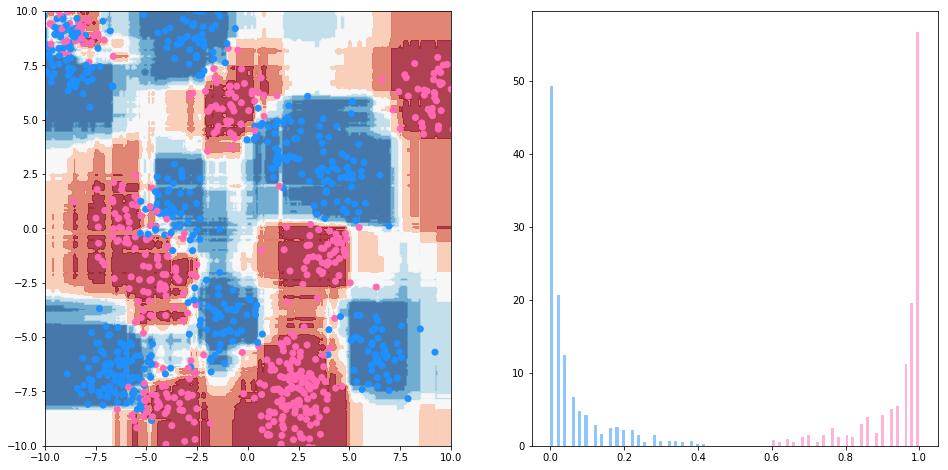

In [12]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X, y)
plot_clf(clf, X, y)

# Model evaluation and selection

In [13]:
from sklearn.metrics import zero_one_loss

print("Training error =", zero_one_loss(y, clf.predict(X)))

Training error = 0.0


## Test error

Issue: the training error is a __biased__ estimate of the generalization error.

Solution: Divide ${\cal L}$ into two disjoint parts called training and test sets (usually using 70% for training and 30% for test).
- Use the training set for fitting the model;
- Use the test set for evaluation only, thereby yielding an unbiased estimate.

In [14]:
from sklearn import preprocessing
print('X is:\n', X, '\n')
print('first 5 elements of y is:\n',y[:5])

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y) 

print('\nAfter enconding y')
print('first 5 elements of y is:\n',y[:5])

X is:
 [[  4.206  -0.552]
 [  2.314  -8.493]
 [ -3.546   0.102]
 ..., 
 [ -9.634  10.064]
 [ -3.626   2.95 ]
 [  3.857   1.651]] 

first 5 elements of y is:
 ['hotpink' 'hotpink' 'dodgerblue' 'dodgerblue' 'hotpink']

After enconding y
first 5 elements of y is:
 [1 1 0 0 1]


In [15]:
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)


print("Training error =", zero_one_loss(y_train, clf.predict(X_train)))
print("Test error =", zero_one_loss(y_test, clf.predict(X_test)))

Training error = 0.0
Test error = 0.096


Summary: Beware of bias when you estimate model performance:
- Training score is often an optimistic estimate of the true performance;
- __The same data should not be used both for training and evaluation.__

## Metrics

### Default score

Estimators come with a built-in default evaluation score
* Accuracy for classification 
* $R^2$ score for regression

In [16]:
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train) 
print("Default score =", clf.score(X_test, y_test))

Default score = 0.912


<center> 
<img src="img/precision.png" style="max-width: 680px; display: inline" />
</center>

In [17]:
from sklearn.metrics import precision_score

print("Precision =", precision_score(y_test, clf.predict(X_test)))

Precision = 0.92


<center> 
<img src="img/recall.jpeg" style="max-width: 680px; display: inline" />
</center>

In [18]:
from sklearn.metrics import recall_score
print("Recall =", recall_score(y_test, clf.predict(X_test)))

Recall = 0.905511811024


# Model Selection
- Finding good hyper-parameters is crucial to control under- and over-fitting, hence achieving better performance.
- The estimated generalization error can be used to select the best model.

## Under- and Over-Fitting

- Under-fitting, __high Bias__: the model is too simple and does not capture the true relation between $X$ and $Y$.
- Over-fitting, __high Variance__: the model is too specific to the training set and does not generalize.

<center> 
<img src="img/modelComplexity.jpg" style="max-width: 680px; display: inline" />
</center>

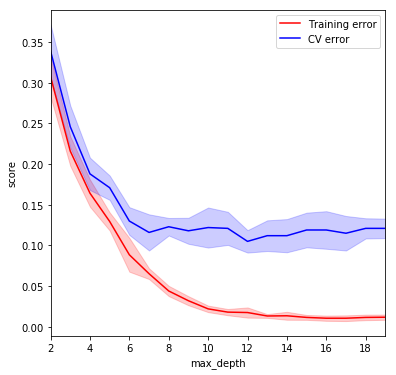

In [19]:
from sklearn.model_selection import validation_curve

# Evaluate parameter range in CV
param_range = range(2, 20)
param_name = "max_depth"


train_scores, test_scores = validation_curve(
    RandomForestClassifier(), X, y, 
    param_name=param_name, 
    param_range=param_range, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot parameter VS estimated error
plt.xlabel(param_name)
plt.ylabel("score")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, 1. - train_scores_mean, color="red", label="Training error")
plt.fill_between(param_range, 
                 1. - train_scores_mean + train_scores_std,
                 1. - train_scores_mean - train_scores_std,
                 alpha=0.2, color="red")
plt.plot(param_range, 1. - test_scores_mean, color="blue", label="CV error")
plt.fill_between(param_range, 
                 1. - test_scores_mean + test_scores_std,
                 1. - test_scores_mean - test_scores_std, 
                 alpha=0.2, color="blue")
plt.legend(loc="best");

In [20]:
# Best trade-off
print("%s = %d, CV error = %f" % (param_name,
                                  param_range[np.argmax(test_scores_mean)],
                                   1. - np.max(test_scores_mean)))

max_depth = 12, CV error = 0.105000
